# Ranging and Ransac

We'll use the following imports:

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

If you get an error from importing sklearn, then you will have to install it using:
conda install scikit-learn

For the exercise we will be using the data taken from a lidar by a robot in a hallway. The data is saved in `laser.csv` and we can import this in Python using numpy as such:

In [22]:
laser = np.genfromtxt('laser.csv', delimiter=',')

The file contains only a single rotation of the lidar. You can open the file in any text editor to get a look at the data. Each number in the file is the distance measured in meters. The lidar starts measuring at 135 degrees and ends at -135 degrees and it rotates the same amount between each measurement. 

## Exercise 3.1
Convert the data in the csv file to x and y coordinates in a Carthesian coordinate system and plot the result using matplotlib.

Hint: Use [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) instead of plt.plot in order to show every measurement as a point. 

541


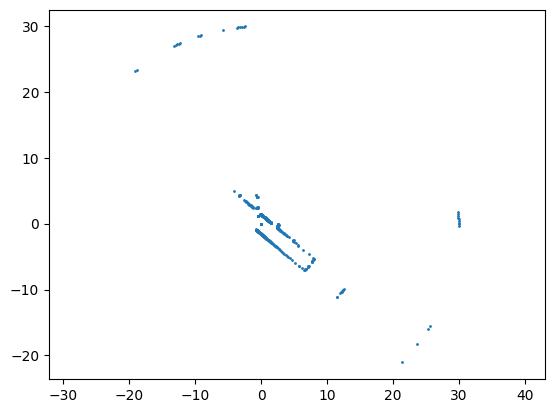

In [38]:
# Convert to x and y coordinates

# x = ??
# y = ??



import math
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = np.loadtxt('laser.csv', delimiter=',')

# Define the angle range and interval
start_angle = 135
end_angle = -135
num_measurements = len(data)
print(num_measurements)

angle_interval = (start_angle - end_angle) / num_measurements

# Convert the distance measurements to x and y coordinates
angles = np.deg2rad(np.arange(start_angle, end_angle, -angle_interval))
x = data * np.cos(angles)
y = data * np.sin(angles)

# Plot the result using scatter
plt.scatter(x, y, s=1)
plt.axis('equal')
plt.show()

# plot(x,y)

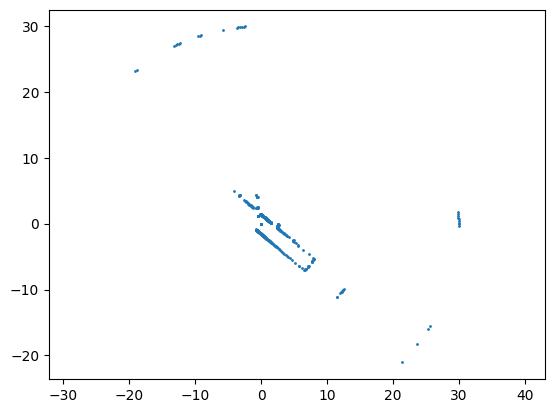

In [23]:
# Convert to x and y coordinates

# x = ??
# y = ??



import math
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = np.loadtxt('laser.csv', delimiter=',')

# Define the angle range and interval
start_angle = 135
end_angle = -135
num_measurements = len(data)
print(
angle_interval = (start_angle - end_angle) / num_measurements

# Convert the distance measurements to x and y coordinates
angles = np.deg2rad(np.arange(start_angle, end_angle, -angle_interval))
x = data * np.cos(angles)
y = data * np.sin(angles)

# Plot the result using scatter
plt.scatter(x, y, s=1)
plt.axis('equal')
plt.show()

# plot(x,y)

## Exercise 3.2

We would like to locate one of the walls in the dataset. To do so we will use [Ransac](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) to fine the best line fit in the noisy data. A Ransac regressor is initialized the following way using sklearn:

In [10]:
ransac = linear_model.RANSACRegressor()

Now that we have our Ransac regressor we can fit it to a dataset (x,y):

In [17]:
# Fit data
# ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=2, residual_threshold=1.0, random_state=0)

Finally, to get the fitted line we can use the predict function. As an argument this takes the x values in which the line will be predicted:

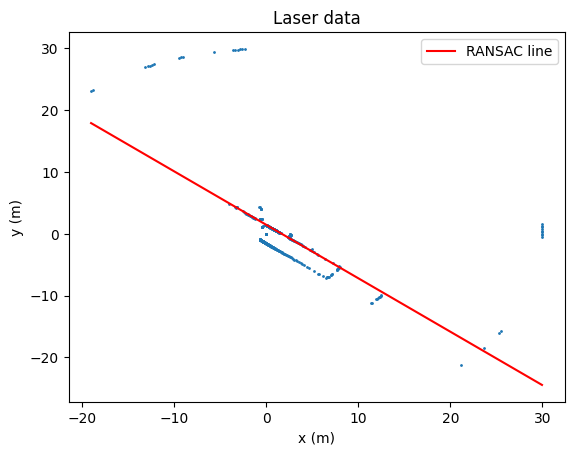

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Load Lidar data
data = np.genfromtxt('laser.csv', delimiter=',')

# Convert polar coordinates to Cartesian coordinates
angles = np.linspace(135, -135, len(data))
x = data * np.cos(np.deg2rad(angles))
y = data * np.sin(np.deg2rad(angles))

# Plot the scatter plot
plt.figure()
plt.scatter(x, y, s=1)
plt.title('Laser data')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# RANSAC regression to fit a line to the data
ransac = linear_model.RANSACRegressor()
ransac.fit(x[:, np.newaxis], y)

# Predict y values for a range of x values
x_fit = np.linspace(np.min(x), np.max(x), 100)
y_fit = ransac.predict(x_fit[:, np.newaxis])

# Plot the fitted line on top of the scatter plot
plt.plot(x_fit, y_fit, color='red', label='RANSAC line')

plt.legend()
plt.show()


Plot the line on top of the scatterplot from before to see the fit.

## Exercise 3.3

To see which data points were used to make the line fit and which were deemed outliers, we can use the function ransac.inlier_mask_

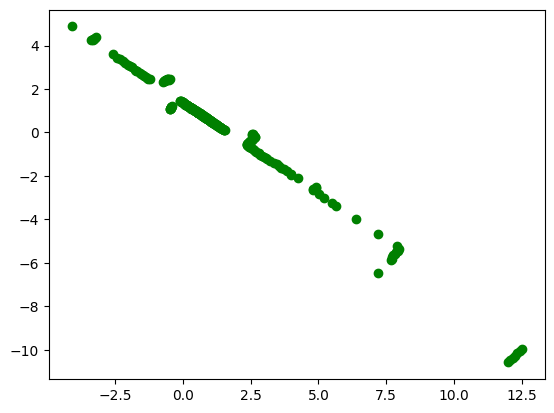

In [32]:
plt.scatter(x[ransac.inlier_mask_], y[ransac.inlier_mask_], color='green')

Find the second hallway wall using another Ransac fit and plot it together with the data points and the first ransac fit.

Hint: Use the outliers from the first Ransac.

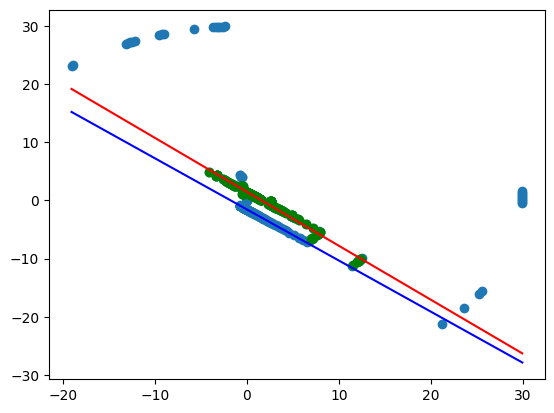

In [33]:
ransac2 = linear_model.RANSACRegressor()

# Find the second hallway wall

# Load lidar data
data = np.genfromtxt('laser.csv', delimiter=',')

# Convert to Cartesian coordinates
angles = np.linspace(np.deg2rad(135), np.deg2rad(-135), len(data))
x = data * np.cos(angles)
y = data * np.sin(angles)

# First Ransac fit
ransac = linear_model.RANSACRegressor()
ransac.fit(x.reshape(-1, 1), y)
line_X = np.arange(x.min(), x.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

# Plot scatter plot with first Ransac fit
plt.scatter(x, y)
plt.plot(line_X, line_y_ransac, color='red')

# Inliers from first Ransac fit
inliers = ransac.inlier_mask_

# Second Ransac fit using outliers from first fit
ransac2 = linear_model.RANSACRegressor()
ransac2.fit(x[~inliers].reshape(-1, 1), y[~inliers])
line_y_ransac2 = ransac2.predict(line_X)

# Plot scatter plot with both Ransac fits
plt.scatter(x[inliers], y[inliers], color='green')
plt.plot(line_X, line_y_ransac2, color='blue')
plt.show()
